# Cluster Analysis

This notebook focuses on analyzing clusters within the conversation data using embeddings generated in `preprocess.py`. The goal is to leverage clustering techniques to uncover patterns in the conversation snippets and discover relationships between clusters and the generated labels.

## Load Data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [2]:
with open("../data/embeddings/snippet_embeddings_reduced.pkl", "rb") as f:
    embeddings = pickle.load(f)

In [3]:
df = pd.read_csv("../data/processed/labeled_with_embeddings.csv")
df.head()

,conversation_id,turn,speaker,text,sentiment_score,sentiment_label,conversation_stage,response_type,embeddings
0,0,0,Customer,"Hi, Im interested in purchasing a new smartph...",0.8625,positive,Introduction,Question,"[0.05453302711248398, -0.16648054122924805, -0..."
1,1,0,Customer,"Hi, Im interested in learning more about your...",0.4019,positive,Introduction,Other,"[0.030139604583382607, 0.06261353194713593, -0..."
2,2,0,Customer,"Hi, Im interested in investing in the stock m...",0.6597,positive,Introduction,Question,"[-0.11529525369405746, 0.05000023916363716, -0..."
3,3,0,Customer,"Hello, Im interested in your financial planni...",0.4019,positive,Introduction,Other,"[-0.14363941550254822, 0.07365528494119644, -0..."
4,4,0,Customer,"Hi, Im interested in purchasing a new laptop....",0.6597,positive,Introduction,Question,"[0.03269049897789955, -0.14516012370586395, 0...."


___

## Evaluating Clustering Algorithms

In [4]:
# Clustering setup for KMeans, DBSCAN, Agglomerative
cluster_range = range(2, 11)
inertia = []
silhouette_scores_kmeans = []
silhouette_scores_dbscan = []
silhouette_scores_agglomerative = []

**Note:** Applying PCA contributed to an increase in silhouette scores. For comparison, below are the results before reduction.

In [5]:
# Embeddings before PCA
with open("../data/embeddings/snippet_embeddings.pkl", "rb") as f:
    old_embeddings = pickle.load(f)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    test_cluster_labels = kmeans.fit_predict(old_embeddings)
    silhouette_avg = silhouette_score(old_embeddings, test_cluster_labels)
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, Inertia={kmeans.inertia_:.2f}")

n_clusters=2, Silhouette Score=0.054, Inertia=281835.69
n_clusters=3, Silhouette Score=0.059, Inertia=269589.97
n_clusters=4, Silhouette Score=0.056, Inertia=261070.00
n_clusters=5, Silhouette Score=0.060, Inertia=251490.12
n_clusters=6, Silhouette Score=0.056, Inertia=247588.45
n_clusters=7, Silhouette Score=0.060, Inertia=242855.25
n_clusters=8, Silhouette Score=0.055, Inertia=237703.34
n_clusters=9, Silhouette Score=0.055, Inertia=234085.75
n_clusters=10, Silhouette Score=0.056, Inertia=231499.16


### K-Means Clustering

In [6]:
# Embeddings after PCA
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, Inertia={kmeans.inertia_:.2f}")

n_clusters=2, Silhouette Score=0.074, Inertia=202909.66
n_clusters=3, Silhouette Score=0.079, Inertia=191102.53
n_clusters=4, Silhouette Score=0.095, Inertia=179478.44
n_clusters=5, Silhouette Score=0.088, Inertia=172687.78
n_clusters=6, Silhouette Score=0.083, Inertia=167779.94
n_clusters=7, Silhouette Score=0.087, Inertia=163015.16
n_clusters=8, Silhouette Score=0.090, Inertia=160373.97
n_clusters=9, Silhouette Score=0.089, Inertia=157029.97
n_clusters=10, Silhouette Score=0.091, Inertia=153320.78


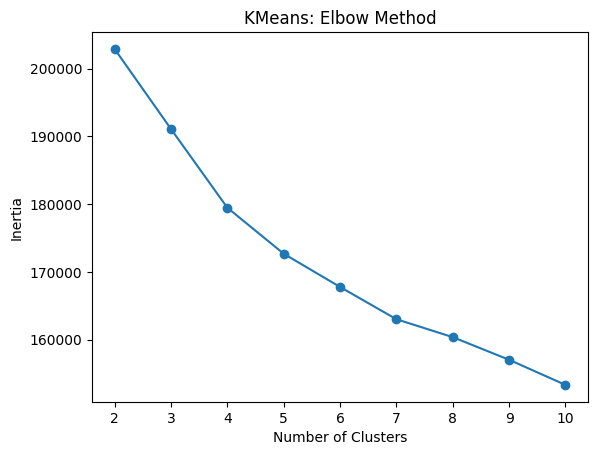

In [7]:
# Elbow plot
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("KMeans: Elbow Method")
plt.show()

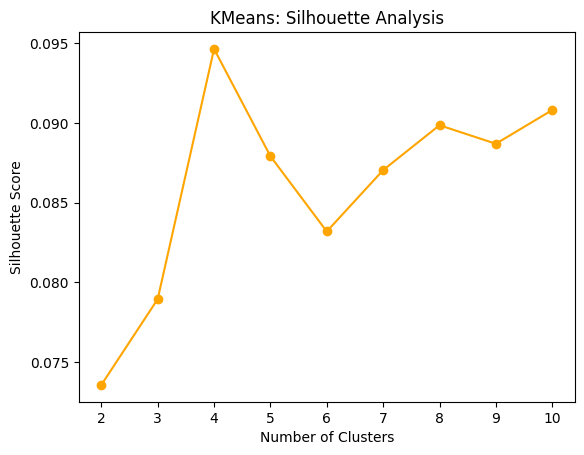

In [8]:
# Silhouette plot
plt.plot(cluster_range, silhouette_scores_kmeans, marker='o', color="orange")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Analysis")
plt.show()

### DBSCAN Clustering

In [9]:
# Various epsilon values for DBSCAN
dbscan_eps_values = [0.5, 0.7, 1.0]
for eps in dbscan_eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores_dbscan.append((eps, silhouette_avg))
    print(f"eps={eps}, Silhouette Score={silhouette_avg:.3f}")

eps=0.5, Silhouette Score=-0.293
eps=0.7, Silhouette Score=-0.241
eps=1.0, Silhouette Score=-0.155


### Agglomerative Clustering

In [11]:
for n_clusters in cluster_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglo.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores_agglomerative.append(silhouette_avg)
    print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}")

n_clusters=2, Silhouette Score=0.067
n_clusters=3, Silhouette Score=0.073
n_clusters=4, Silhouette Score=0.077
n_clusters=5, Silhouette Score=0.074
n_clusters=6, Silhouette Score=0.077
n_clusters=7, Silhouette Score=0.073
n_clusters=8, Silhouette Score=0.065
n_clusters=9, Silhouette Score=0.067
n_clusters=10, Silhouette Score=0.063


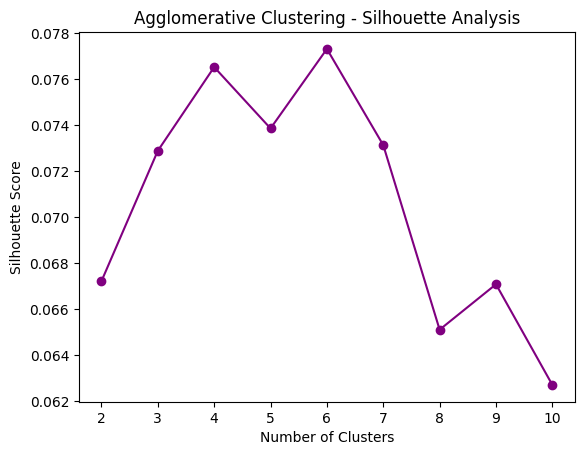

In [12]:
# Agglomerative Clustering Silhouette Scores
plt.plot(cluster_range, silhouette_scores_agglomerative, marker='o', color="purple")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering - Silhouette Analysis")
plt.show()

___

## Clustering Model Selection and Visualization

The optimal number of clusters was determined to be **4**, with **K-means** yielding the highest silhouette score of 0.095. Although this score is low, indicating poor cluster separation, K-means will be used as the best model for the time being. Exploring better clustering techniques or refining the embeddings even further should be prioritized if time permits.

### Model: K-means clustering with n_clusters=4

In [14]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(embeddings)
silhouette_avg = silhouette_score(embeddings, cluster_labels)
print(f"n_clusters={n_clusters}, Silhouette Score={silhouette_avg:.3f}, Inertia={kmeans.inertia_:.2f}")

n_clusters=4, Silhouette Score=0.095, Inertia=179478.42


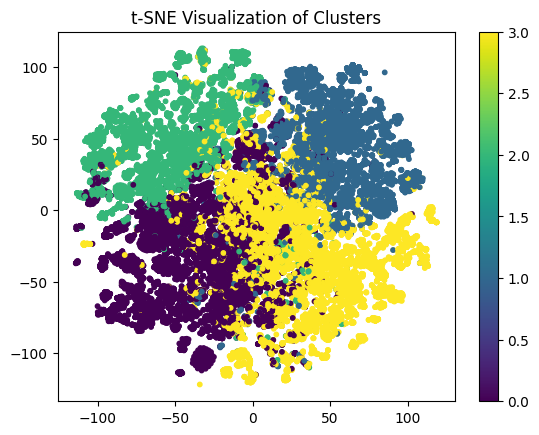

In [15]:
tsne = TSNE(n_components=2, random_state=0)
tsne_embeddings = tsne.fit_transform(embeddings)

plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], c=cluster_labels, cmap='viridis', s=10)
plt.title("t-SNE Visualization of Clusters")
plt.colorbar()
plt.show()

**Observation:** This visualization of the 4 clusters shows some level of grouping, but there is overlap between the clusters. This suggests that the current embeddings or clustering method might not be fully capturing the distinct underlying patterns of the dataset. There is room for improvement, which can be done with more refining of the embedding generation process or by exploring more advanced clustering algorithms given more time. The lack of distinct separation may also indicate that the dataset is ambiguous or noisy itself.

### sentiment_label

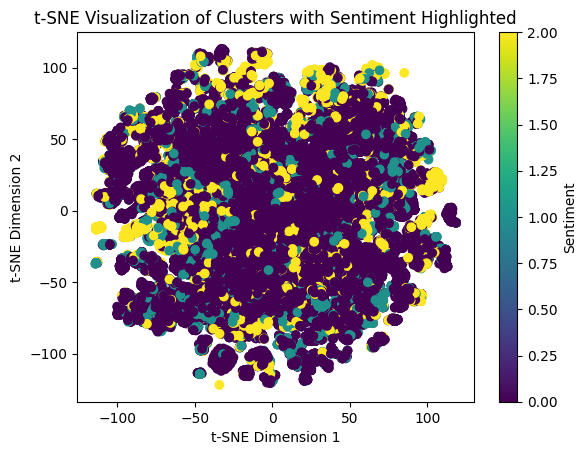

In [33]:
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=df['sentiment_label'].factorize()[0])
plt.colorbar(scatter, label="Sentiment")
plt.title("t-SNE Visualization of Clusters with Sentiment Highlighted")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

The distribution of sentiment is spread across all clusters without clear distinctions. Most points are dominated by positive sentiment, which is reflective of the overall distribution of positive sentiment in the dataset. This suggests that clustering may not strongly differentiate by sentiment.

### conversation_stage

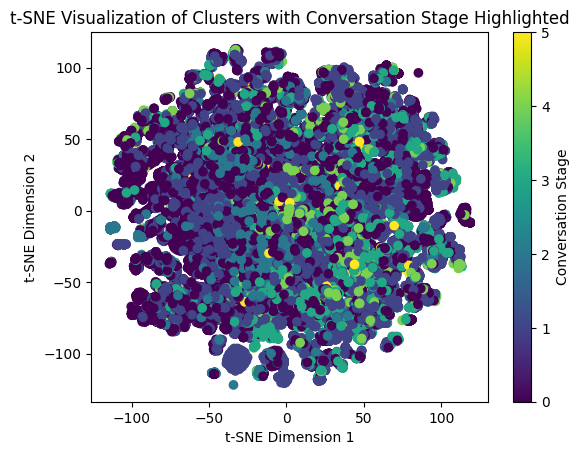

In [34]:
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=df['conversation_stage'].factorize()[0])
plt.colorbar(scatter, label="Conversation Stage")
plt.title("t-SNE Visualization of Clusters with Conversation Stage Highlighted")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Conversation stages are also pretty spread out. There are slight tendencies for some stages to group together, but no cluster seems to distinctly represent a single stage. This could indicate an overlap in conversation stages or might be due to limitations in clustering.

### response_type

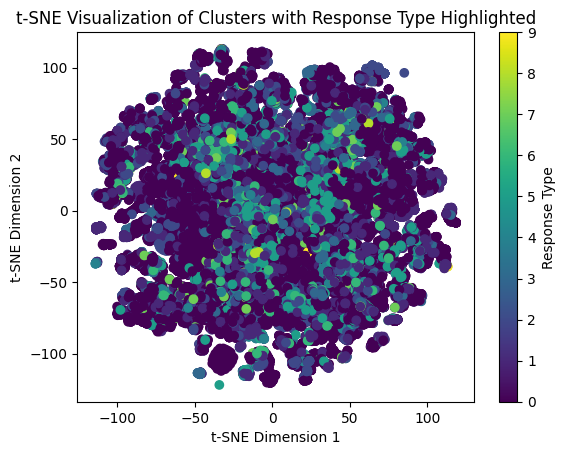

In [35]:
scatter = plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=df['response_type'].factorize()[0])
plt.colorbar(scatter, label="Response Type")
plt.title("t-SNE Visualization of Clusters with Response Type Highlighted")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

Reponse types also have significant overlaps and do not show any clear separation between clusters. This may suggest that response types may not be well-represented in clustering.

### Conclusion

The lack of clear boundaries or strong links to these labels suggests that the clusters do not capture meaningful conversation features. To try for better results, improving embeddings or trying different clustering methods should be done.

____

## Cluster Analysis

**TODO when revisiting:** Analyze clusters by looking at their...
* Distribution of conversation stages, response types, or sentiments across clusters
* Frequencies of cluster membership
* Word/phrase commonalities for each cluster
* Visualizations

____

## Summary

**Final Clustering Model Specifications**
* **Embedding Model Used:** paraphrase-mpnet-base-v2
    * batch_size: 32
* **Clustering Model Used:** K-means
    * n_clusters: 4
    * metric: silhouette_score

**Attempts and Insights:**

I experimented with various clustering approaches, specifically K-means, DBSCAN, and Agglomerative Clustering. I combined these algorithms with dimensionality reduction techniques: PCA for better embeddings and t-SNE for visualization. While the pipeline successfully produced clusters, there was a lack of distinct boundaries and meaningful trends with the dataset's generated labels (eg. sentiment, conversation stage, or response type). This suggests that the clustering approach did not yield actionable insights.

**Challenges:**
* Low silhouette scores were obtained, signaling weak cluster separation.
* The t-SNE visualizations showed overlapping clusters, making it difficult to interpret clusters.
* The embeddings may not effectively separate conversation features for clustering purposes.

**Next Steps:**
1. **Revisit clustering in the future** - With further refinement of embeddings or alternative clustering algorithms, clustering could reveal more meaningful patterns.
    * This should include better label generation if given the time.
2. Efforts will be shifted toward **predictive tasks.**
3. **Build APIs** that utilize the generated embeddings for response type prediction, sentiment tracking, or etc.